<a href="https://colab.research.google.com/github/mustaphamerakech/tpDataScience/blob/main/tpDataScineceClining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Charger le fichier Excel
df = pd.read_csv("/content/drive/MyDrive/tpDataScience/jobs.csv")


In [ ]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,company_name,job_name,work_shift_and_experience,localisation,publish_date,more_info,additional_information
0,Sarl Future Motors Algérie,Technicien Engins,Confirmé / Expérimenté (3 à 5 ans),"Alger, Algérie",Hier,https://www.emploitic.com/offres-d-emploi/offr...,Mission principale : Le Technicien Engins est...
1,Sarl Future Motors Algérie,Aide Mécanicien,Confirmé / Expérimenté (3 à 5 ans),"Alger, Algérie",Hier,https://www.emploitic.com/offres-d-emploi/offr...,Mission principale : Sous la supervision du t...
2,Entreprise anonyme,Caissier,Confirmé / Expérimenté (3 à 5 ans),"Alger, Algérie",Hier,https://www.emploitic.com/offres-d-emploi/offr...,Mission du Poste : Le caissier est chargé d'as...
3,Altius Contact,Superviseur dans le domaine de la télévente,Responsable d'équipe (6 à 10 ans),"Tizi Ouzou, Algérie",Hier,https://www.emploitic.com/offres-d-emploi/offr...,Nous recherchons un superviseur en télévente e...
4,Entreprise anonyme,Coordinateur Trésorerie et Relations Bancaires,Responsable d'équipe (Plus de 10 ans),"Bab El Oued, Alger, Algérie...",Hier,https://www.emploitic.com/offres-d-emploi/offr...,Missions Principales :Veiller à la solvabilité...


In [ ]:
# Utiliser str.extract pour extraire les informations
df[['work_shift', 'experience']] = df['work_shift_and_experience'].str.extract(r'([^\(]+)\s*\(([^)]+)\)')
df = df.drop(['more_info', 'work_shift_and_experience'], axis=1)


In [ ]:
df['additional_information'].fillna('unknown', inplace=True)

In [ ]:
df.head()

,company_name,job_name,localisation,publish_date,additional_information,work_shift,experience
0,Sarl Future Motors Algérie,Technicien Engins,"Alger, Algérie",Hier,Mission principale : Le Technicien Engins est...,Confirmé / Expérimenté,3 à 5 ans
1,Sarl Future Motors Algérie,Aide Mécanicien,"Alger, Algérie",Hier,Mission principale : Sous la supervision du t...,Confirmé / Expérimenté,3 à 5 ans
2,Entreprise anonyme,Caissier,"Alger, Algérie",Hier,Mission du Poste : Le caissier est chargé d'as...,Confirmé / Expérimenté,3 à 5 ans
3,Altius Contact,Superviseur dans le domaine de la télévente,"Tizi Ouzou, Algérie",Hier,Nous recherchons un superviseur en télévente e...,Responsable d'équipe,6 à 10 ans
4,Entreprise anonyme,Coordinateur Trésorerie et Relations Bancaires,"Bab El Oued, Alger, Algérie...",Hier,Missions Principales :Veiller à la solvabilité...,Responsable d'équipe,Plus de 10 ans


In [ ]:
!python -m spacy download fr_core_news_sm


2024-01-28 21:22:11.657362: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-28 21:22:11.657425: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-28 21:22:11.658371: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-28 21:22:12.699256: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 36.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')


In [ ]:
import pandas as pd
from collections import Counter
import spacy

# Charger le modèle spaCy en français
nlp = spacy.load('fr_core_news_sm')



# Exemple : Supposons que votre colonne s'appelle 'additional_information'
column_name = 'additional_information'

# Fonction pour le prétraitement du texte
def preprocess_text(text):
    doc = nlp(text)
    # Retirer les mots vides, la ponctuation, et convertir en minuscules
    tokens = [token.text.lower() for token in doc if not token.is_stop and token.is_alpha]
    return tokens

# Prétraiter le texte et compter les occurrences
all_tokens = df[column_name].apply(preprocess_text)
all_tokens = [token for sublist in all_tokens for token in sublist]
word_counts = Counter(all_tokens)

# Afficher les 10 mots les plus fréquemment utilisés
most_common_words = word_counts.most_common(50)
print(most_common_words)


[('gestion', 2585), ('assurer', 2472), ('and', 1916), ('poste', 1749), ('expérience', 1712), ('entreprise', 1707), ('clients', 1597), ('communication', 1363), ('suivi', 1345), ('équipe', 1326), ('produits', 1283), ('compétences', 1241), ('travail', 1224), ('missions', 1174), ('formation', 1149), ('domaine', 1139), ('qualité', 1103), ('the', 1060), ('sécurité', 1032), ('ans', 983), ('profil', 971), ('développement', 959), ('capacité', 900), ('gérer', 899), ('techniques', 885), ('maîtrise', 880), ('connaissance', 854), ('to', 851), ('bonne', 842), ('production', 804), ('mise', 796), ('sens', 793), ('outils', 765), ('mettre', 756), ('service', 753), ('procédures', 750), ('maitrise', 748), ('marketing', 747), ('maintenance', 721), ('participer', 721), ('recherché', 720), ('of', 715), ('respect', 700), ('données', 698), ('activités', 694), ('vente', 693), ('analyse', 687), ('objectifs', 683), ('place', 676), ('services', 671)]


In [ ]:
import pandas as pd
import spacy

# Charger le modèle spaCy en français
nlp = spacy.load('fr_core_news_sm')

# Mots clés à rechercher
mots_cles = ['gestion', 'assurer', 'poste', 'expérience', 'entreprise', 'clients', 'suivi', 'équipe', 'produits',
             'compétences', 'travail', 'missions', 'formation', 'domaine', 'profil', 'développement', 'gérer',
             'techniques', 'maîtrise', 'connaissance', 'outils', 'service', 'maitrise', 'objectifs', 'place',
             'compétences', 'entreprise', 'équipe', 'travail', 'missions', 'formation', 'domaine', 'profil',
             'maîtrise', 'objectifs']

# Fonction pour nettoyer et extraire des informations
def clean_and_extract_information(text):
    doc = nlp(text)

    # Extraire les entités nommées pertinentes
    entities = [ent.text for ent in doc.ents if ent.label_ in ['ORG', 'LOC', 'DATE', 'PERSON']]

    # Extraire les compétences (par exemple, en recherchant des mots clés spécifiques)
    competences = [token.text for token in doc if 'compétence' in token.text.lower() or 'connaissance' in token.text.lower()]

    # Extraire les tâches à faire (par exemple, en recherchant des mots clés spécifiques)
    taches = [sent.text for sent in doc.sents if 'tâches à faire' in sent.text.lower()]

    # Extraire les diplômes (par exemple, en recherchant des mots clés spécifiques)
    diplomes = [ent.text for ent in doc.ents if ent.label_ == 'DIPLOME']

    # Extraire les missions (par exemple, en recherchant des mots clés spécifiques)
    missions = [sent.text for sent in doc.sents if 'missions' in sent.text.lower()]

    # Extraire le profil requis (par exemple, en recherchant des mots clés spécifiques)
    profil_requis = [sent.text for sent in doc.sents if 'profil requis' in sent.text.lower()]

    # Extraire les mots clés spécifiques
    mots_cles_extraits = [token.text for token in doc if token.text.lower() in mots_cles] + \
                         [token.text for token in doc if token.lemma_.lower() in mots_cles]

    return {'entities': entities, 'competences': competences, 'taches': taches, 'diplomes': diplomes,
            'missions': missions, 'profil_requis': profil_requis, 'mots_cles': mots_cles_extraits}

# Appliquer la fonction à la colonne 'additional_information'
df['extracted_information'] = df['additional_information'].apply(clean_and_extract_information)

# Afficher les résultats
print(df[['additional_information', 'extracted_information']])


                                 additional_information  \
0     Mission principale :  Le Technicien Engins est...   
1     Mission principale :  Sous la supervision du t...   
2     Mission du Poste : Le caissier est chargé d'as...   
3     Nous recherchons un superviseur en télévente e...   
4     Missions Principales :Veiller à la solvabilité...   
...                                                 ...   
2395  MISSION DU POSTE :Organiser l’activité et anim...   
2396  Description :  Nous recherchons un Responsable...   
2397  Importante entreprise industrielle, recrute po...   
2398  Emploitic.com est le site internet leader du r...   
2399  1.        Volet achats Indirectes ·           ...   

                                  extracted_information  
0     {'entities': ['Technicien Engins', 'l’', 'Soli...  
1     {'entities': ['l’'], 'competences': ['compéten...  
2     {'entities': ['Principales', 'Accueillir', 'Fo...  
3     {'entities': [], 'competences': ['compétences'...  
4

In [ ]:
df.head(10)

,company_name,job_name,localisation,publish_date,additional_information,work_shift,experience,extracted_information
0,Sarl Future Motors Algérie,Technicien Engins,"Alger, Algérie",Hier,Mission principale : Le Technicien Engins est...,Confirmé / Expérimenté,3 à 5 ans,"{'entities': ['Technicien Engins', 'l’', 'Soli..."
1,Sarl Future Motors Algérie,Aide Mécanicien,"Alger, Algérie",Hier,Mission principale : Sous la supervision du t...,Confirmé / Expérimenté,3 à 5 ans,"{'entities': ['l’'], 'competences': ['compéten..."
2,Entreprise anonyme,Caissier,"Alger, Algérie",Hier,Mission du Poste : Le caissier est chargé d'as...,Confirmé / Expérimenté,3 à 5 ans,"{'entities': ['Principales', 'Accueillir', 'Fo..."
3,Altius Contact,Superviseur dans le domaine de la télévente,"Tizi Ouzou, Algérie",Hier,Nous recherchons un superviseur en télévente e...,Responsable d'équipe,6 à 10 ans,"{'entities': [], 'competences': ['compétences'..."
4,Entreprise anonyme,Coordinateur Trésorerie et Relations Bancaires,"Bab El Oued, Alger, Algérie...",Hier,Missions Principales :Veiller à la solvabilité...,Responsable d'équipe,Plus de 10 ans,"{'entities': ['l’', 'l’', 'Import', 'Audit', '..."
5,eTalent Solutions,Directeur des Ressources Humaines,"Alger, Algérie",Avant hier,eTalent recrute pour l'un de ses clients : Un ...,Cadre dirigeant,Plus de 10 ans,"{'entities': ['DRH', 'Compétences', 'Requises'..."
6,Sarl Somafe,Chef d'Antenne Commercial,"Oran, Oran, Algérie",Avant hier,Missions du poste:Est chargé de développer le ...,Manager / Responsable département,Plus de 10 ans,"{'entities': ['l’', 'Réalise l’', 'l’', 'l’', ..."
7,Entreprise anonyme,Responsable Maintenance Auxiliaire,"Alger, Algérie",Avant hier,Missions et Responsabilités :Superviser les tr...,Responsable d'équipe,6 à 10 ans,"{'entities': ['Répondre', 'Planifier', 'l’', '..."
8,Entreprise anonyme,coordinature QHSE,"Bouira, Algérie",Avant hier,"Missions: Planifier, mettre en œuvre et décli...",Responsable d'équipe,6 à 10 ans,"{'entities': ['l’', 'Faire', 'l’', 'l’', 'l’',..."
9,Entreprise anonyme,Cadre Planning,"Alger, Algérie",Avant hier,Missions du poste :\n\nPlanifier les programme...,Responsable d'équipe,Plus de 10 ans,"{'entities': ['Planifier', 'Etablir', 'Elabore..."


In [ ]:
# Accéder aux informations pour la première ligne
first_row_info = df['extracted_information'][9]

# Accéder aux entités nommées
entities = first_row_info.get('entities', [])

# Accéder aux compétences
competences = first_row_info.get('competences', [])

# Accéder aux tâches à faire
taches = first_row_info.get('taches', [])

# Accéder aux diplômes
diplomes = first_row_info.get('diplomes', [])

# Accéder aux missions
missions = first_row_info.get('missions', [])

# Accéder au profil requis
profil_requis = first_row_info.get('profil_requis', [])

# Afficher les informations pour la première ligne
print("Entités nommées:", entities)
print("Compétences:", competences)
print("Tâches à faire:", taches)
print("Diplômes:", diplomes)
print("Missions:", missions)
print("Profil requis:", profil_requis)


Entités nommées: ['Planifier', 'Etablir', 'Elaborer', 'Opérationnelle', 'Conditions', 'Avantages', 'Possibilité']
Compétences: ['connaissance']
Tâches à faire: []
Diplômes: []
Missions: ["Missions du poste\xa0:\n\nPlanifier les programmes d'exécution des travaux ,de mobilisation du personnel et\xa0 de moyens \xa0\xa0matériels\xa0;\n", ';\nMaîtriser la langue française écrite et parlée et connaissance de la langue\xa0 anglaise\xa0\nDisponibilité et Apte à effectuer des missions de travail \xa0sur nos différents sites au niveau national .\n\n\xa0\xa0\nConditions \xa0:\n\n\xa0Disponibilité immédiate.\n\n\xa0\nAvantages\xa0:\n\n']
Profil requis: []


In [ ]:
df.head()

,company_name,job_name,localisation,publish_date,additional_information,work_shift,experience,extracted_information
0,Sarl Future Motors Algérie,Technicien Engins,"Alger, Algérie",Hier,Mission principale : Le Technicien Engins est...,Confirmé / Expérimenté,3 à 5 ans,"{'entities': ['Technicien Engins', 'l’', 'Soli..."
1,Sarl Future Motors Algérie,Aide Mécanicien,"Alger, Algérie",Hier,Mission principale : Sous la supervision du t...,Confirmé / Expérimenté,3 à 5 ans,"{'entities': ['l’'], 'competences': ['compéten..."
2,Entreprise anonyme,Caissier,"Alger, Algérie",Hier,Mission du Poste : Le caissier est chargé d'as...,Confirmé / Expérimenté,3 à 5 ans,"{'entities': ['Principales', 'Accueillir', 'Fo..."
3,Altius Contact,Superviseur dans le domaine de la télévente,"Tizi Ouzou, Algérie",Hier,Nous recherchons un superviseur en télévente e...,Responsable d'équipe,6 à 10 ans,"{'entities': [], 'competences': ['compétences'..."
4,Entreprise anonyme,Coordinateur Trésorerie et Relations Bancaires,"Bab El Oued, Alger, Algérie...",Hier,Missions Principales :Veiller à la solvabilité...,Responsable d'équipe,Plus de 10 ans,"{'entities': ['l’', 'l’', 'Import', 'Audit', '..."


In [ ]:
import pandas as pd
import spacy

# Charger le modèle spaCy en français
nlp = spacy.load('fr_core_news_sm')

# Exemple : Supposons que votre colonne s'appelle 'extracted_information'
column_name = 'extracted_information'

# Fonction pour le prétraitement du texte
def preprocess_text(text_or_dict):
    if isinstance(text_or_dict, dict):
        # Si c'est un dictionnaire, convertissez les valeurs en chaînes de caractères et traitez-les
        processed_text = ' '.join(str(value) for value in text_or_dict.values())
    else:
        # Sinon, c'est probablement déjà une chaîne de caractères
        processed_text = text_or_dict

    doc = nlp(processed_text)
    # Retirer les mots vides, la ponctuation, et convertir en minuscules
    tokens = [token.text.lower() for token in doc if not token.is_stop and token.is_alpha]
    return tokens

# Appliquer la fonction de prétraitement à la colonne 'extracted_information'
df[column_name] = df[column_name].apply(preprocess_text)

# Afficher les résultats
print(df[[column_name]])


                                  extracted_information
0     [technicien, engins, l, solides, diplôme, comp...
1     [l, compétences, compétences, compétences, tec...
2     [principales, accueillir, fournir, information...
3     [compétences, équipe, expérience, compétences,...
4     [l, l, import, audit, contrôle, hiérarchie, ma...
...                                                 ...
2395  [l, interne, l, s, l, manquantsil, l, l, l, l,...
2396  [lmd, bac, ingéniorat, bac, anglais, compétenc...
2397  [sétif, ri, ressources, humaines, administrati...
2398  [algérie, l, customer, service, manager, emplo...
2399  [indirectes, prospecter, l, d, identifier, ela...

[2400 rows x 1 columns]


In [ ]:
print(df[column_name].head(10))


0    [technicien, engins, l, solides, diplôme, comp...
1    [l, compétences, compétences, compétences, tec...
2    [principales, accueillir, fournir, information...
3    [compétences, équipe, expérience, compétences,...
4    [l, l, import, audit, contrôle, hiérarchie, ma...
5    [drh, compétences, requises, master, adaptabil...
6    [l, réalise, l, l, l, l, l, universitaire, com...
7    [répondre, planifier, l, remplir, transmettre,...
8    [l, faire, l, l, l, collaborer, cphs, sst, pla...
9    [planifier, etablir, elaborer, opérationnelle,...
Name: extracted_information, dtype: object


In [ ]:
import pandas as pd
import spacy

# Charger le modèle spaCy en français
nlp = spacy.load('fr_core_news_sm')

# Exemple : Supposons que votre colonne s'appelle 'extracted_information'
column_name = 'extracted_information'

# Fonction pour le prétraitement du texte
def preprocess_text(tokens):
    # Retirer les mots vides, la ponctuation, et convertir en minuscules
    tokens = [token.lower() for token in tokens if len(token) > 1]
    return tokens

# Appliquer la fonction de prétraitement à la colonne 'extracted_information'
df[column_name] = df[column_name].apply(preprocess_text)

# Afficher les résultats
print(df[['extracted_information']])


                                  extracted_information
0     [technicien, engins, solides, diplôme, compéte...
1     [compétences, compétences, compétences, techni...
2     [principales, accueillir, fournir, information...
3     [compétences, équipe, expérience, compétences,...
4     [import, audit, contrôle, hiérarchie, manuelle...
...                                                 ...
2395  [interne, manquantsil, alimenter, répondre, co...
2396  [lmd, bac, ingéniorat, bac, anglais, compétenc...
2397  [sétif, ri, ressources, humaines, administrati...
2398  [algérie, customer, service, manager, emploiti...
2399  [indirectes, prospecter, identifier, elaborer,...

[2400 rows x 1 columns]


In [ ]:
df.head()

,company_name,job_name,localisation,publish_date,additional_information,work_shift,experience,extracted_information
0,Sarl Future Motors Algérie,Technicien Engins,"Alger, Algérie",Hier,Mission principale : Le Technicien Engins est...,Confirmé / Expérimenté,3 à 5 ans,"[technicien, engins, solides, diplôme, compéte..."
1,Sarl Future Motors Algérie,Aide Mécanicien,"Alger, Algérie",Hier,Mission principale : Sous la supervision du t...,Confirmé / Expérimenté,3 à 5 ans,"[compétences, compétences, compétences, techni..."
2,Entreprise anonyme,Caissier,"Alger, Algérie",Hier,Mission du Poste : Le caissier est chargé d'as...,Confirmé / Expérimenté,3 à 5 ans,"[principales, accueillir, fournir, information..."
3,Altius Contact,Superviseur dans le domaine de la télévente,"Tizi Ouzou, Algérie",Hier,Nous recherchons un superviseur en télévente e...,Responsable d'équipe,6 à 10 ans,"[compétences, équipe, expérience, compétences,..."
4,Entreprise anonyme,Coordinateur Trésorerie et Relations Bancaires,"Bab El Oued, Alger, Algérie...",Hier,Missions Principales :Veiller à la solvabilité...,Responsable d'équipe,Plus de 10 ans,"[import, audit, contrôle, hiérarchie, manuelle..."


In [ ]:
# Afficher les noms de toutes les colonnes dans votre DataFrame
print(df.columns)


Index(['company_name', 'job_name', 'localisation', 'publish_date',
       'additional_information', 'work_shift', 'experience',
       'extracted_information'],
      dtype='object')


In [ ]:
# Supposons que votre DataFrame s'appelle df
df.to_csv('/content/jobs_clean.csv', index=False)


In [ ]:
df = pd.read_csv("/content/jobs_clean.csv")
df.head()

,company_name,job_name,localisation,publish_date,additional_information,work_shift,experience,extracted_information
0,Sarl Future Motors Algérie,Technicien Engins,"Alger, Algérie",Hier,Mission principale : Le Technicien Engins est...,Confirmé / Expérimenté,3 à 5 ans,"['technicien', 'engins', 'solides', 'diplôme',..."
1,Sarl Future Motors Algérie,Aide Mécanicien,"Alger, Algérie",Hier,Mission principale : Sous la supervision du t...,Confirmé / Expérimenté,3 à 5 ans,"['compétences', 'compétences', 'compétences', ..."
2,Entreprise anonyme,Caissier,"Alger, Algérie",Hier,Mission du Poste : Le caissier est chargé d'as...,Confirmé / Expérimenté,3 à 5 ans,"['principales', 'accueillir', 'fournir', 'info..."
3,Altius Contact,Superviseur dans le domaine de la télévente,"Tizi Ouzou, Algérie",Hier,Nous recherchons un superviseur en télévente e...,Responsable d'équipe,6 à 10 ans,"['compétences', 'équipe', 'expérience', 'compé..."
4,Entreprise anonyme,Coordinateur Trésorerie et Relations Bancaires,"Bab El Oued, Alger, Algérie...",Hier,Missions Principales :Veiller à la solvabilité...,Responsable d'équipe,Plus de 10 ans,"['import', 'audit', 'contrôle', 'hiérarchie', ..."


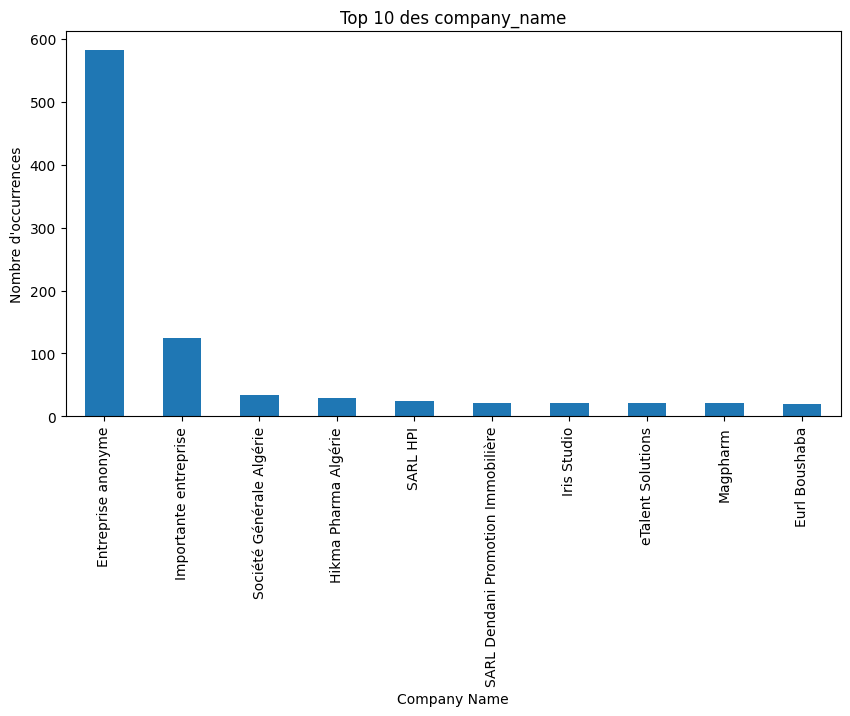

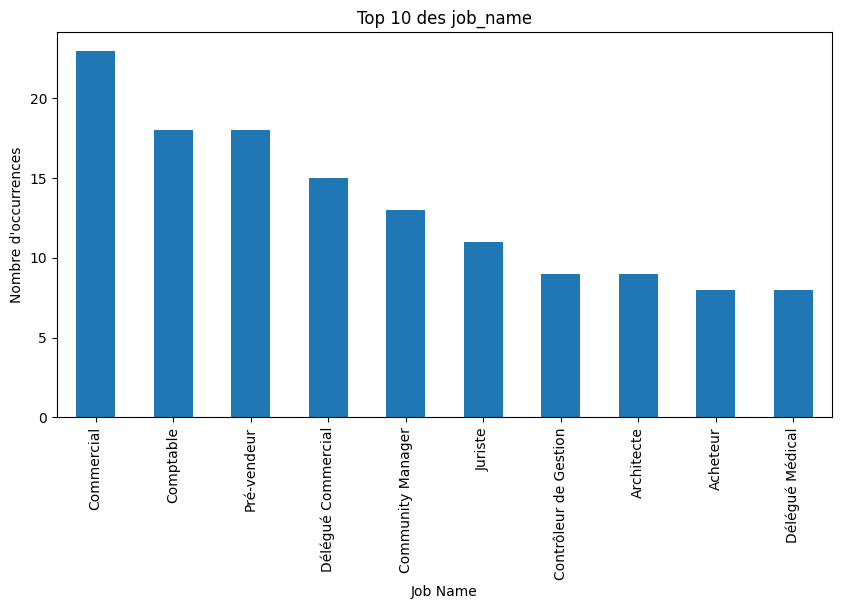

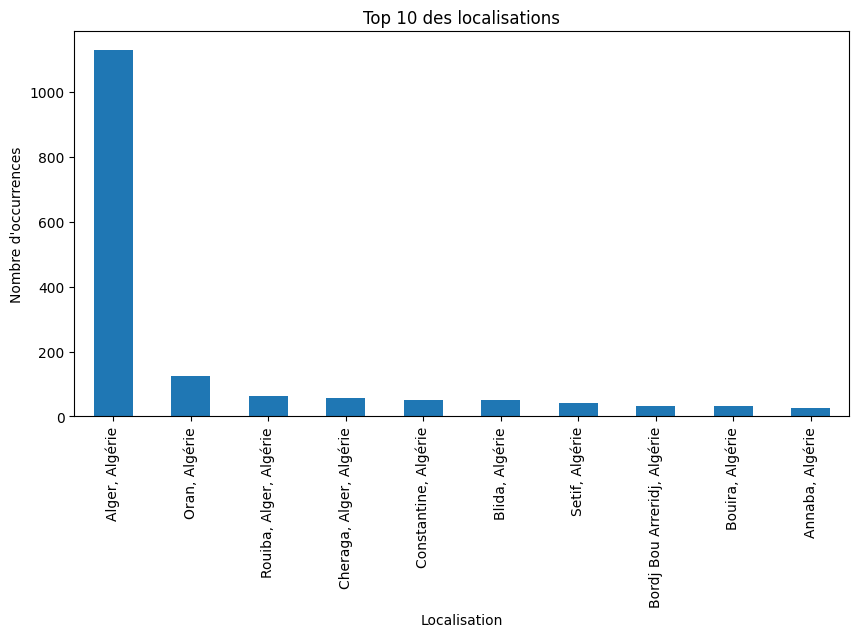

In [ ]:
import matplotlib.pyplot as plt

# Supposons que votre DataFrame s'appelle df

# Top 10 des company_name
top_company_names = df['company_name'].value_counts().head(10)
top_company_names.plot(kind='bar', figsize=(10, 5))
plt.title('Top 10 des company_name')
plt.xlabel('Company Name')
plt.ylabel('Nombre d\'occurrences')
plt.show()

# Top 10 des job_name
top_job_names = df['job_name'].value_counts().head(10)
top_job_names.plot(kind='bar', figsize=(10, 5))
plt.title('Top 10 des job_name')
plt.xlabel('Job Name')
plt.ylabel('Nombre d\'occurrences')
plt.show()

# Top 10 des localisations
top_localisations = df['localisation'].value_counts().head(10)
top_localisations.plot(kind='bar', figsize=(10, 5))
plt.title('Top 10 des localisations')
plt.xlabel('Localisation')
plt.ylabel('Nombre d\'occurrences')
plt.show()


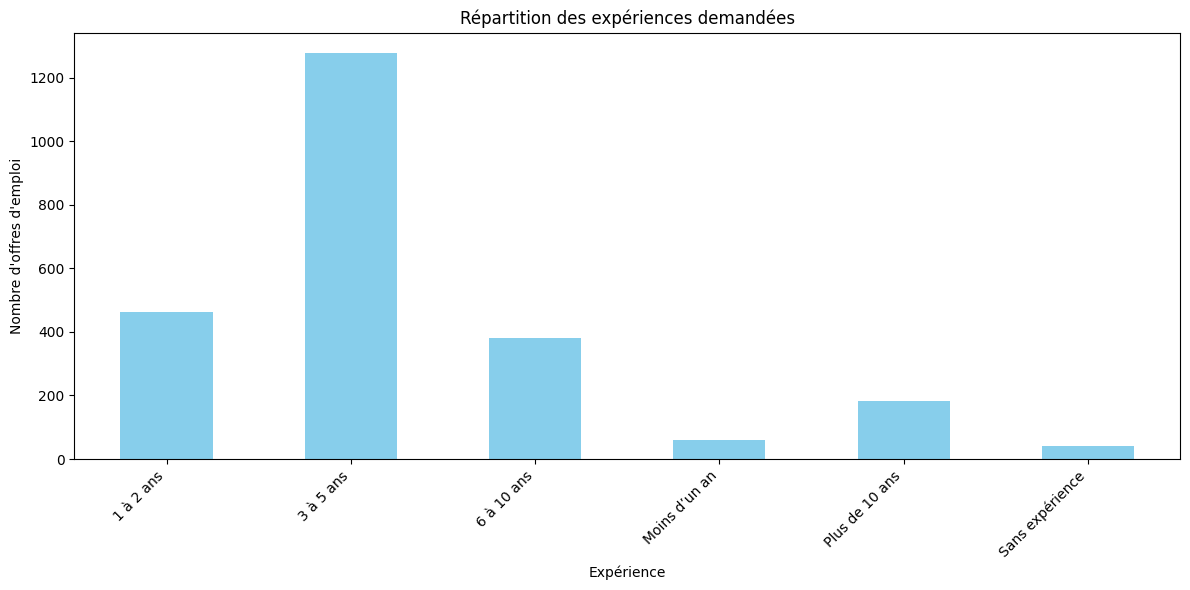

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Groupez par expérience et comptez le nombre d'occurrences
experience_count = df['experience'].value_counts()

# Triez le DataFrame par expérience
experience_count = experience_count.sort_index()

# Créez un graphique à barres
plt.figure(figsize=(12, 6))
experience_count.plot(kind='bar', color='skyblue')
plt.title('Répartition des expériences demandées')
plt.xlabel('Expérience')
plt.ylabel('Nombre d\'offres d\'emploi')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
